In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set()

In [2]:
# To make interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

# To make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

<h2>Listing the details file</h2>

In [3]:
print(os.listdir("./archive/"))

['neighbourhoods.csv', 'listings_details.csv', '.~lock.listings_details.csv#', 'listings.csv', 'neighbourhoods.geojson', 'reviews.csv', 'reviews_details.csv', 'calendar.csv']


In [4]:
listings = pd.read_csv("./archive/listings.csv")
listings_details = pd.read_csv("./archive/listings_details.csv", low_memory=False)
calender = pd.read_csv("./archive/calendar.csv")
reviews_details = pd.read_csv("./archive/reviews_details.csv")

In [5]:
print(listings.shape)

(20030, 16)


In [6]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
print(listings_details.shape)

(20030, 96)


<h3>The listing contains only the 15 columns including the one to be the id and most of them are important for us, But the listing details contains almost 96 columns, from which all are not important to use, So we will use the some of them and will combine them with the listings data frame</h3>

In [8]:
print(listings_details.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
listings_details.head(n=5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [10]:
listings.head(n=5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [11]:
target_columns = ["id", "property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate", "street", "weekly_price", "monthly_price", "market"]
listings_details = listings_details[target_columns]
listings = pd.merge(listings, listings_details, on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 0 to 20029
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20030 non-null  int64  
 1   name                            19992 non-null  object 
 2   host_id                         20030 non-null  int64  
 3   host_name                       20026 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   20030 non-null  object 
 6   latitude                        20030 non-null  float64
 7   longitude                       20030 non-null  float64
 8   room_type                       20030 non-null  object 
 9   price                           20030 non-null  int64  
 10  minimum_nights                  20030 non-null  int64  
 11  number_of_reviews               20030 non-null  int64  
 12  last_review                     

<h3>We see that neighbourhood_group is useless in the Amsterdam, as it contains zero non-null objects.  Below, I getting rod of this variable, ans am showing the head of the data frame that i am going to work with</h3>

In [12]:
listings = listings.drop(columns=['neighbourhood_group'])
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.strip('%'))
listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,street,weekly_price,monthly_price,market
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,...,15,https://www.airbnb.com/rooms/2818,t,"Upon arriving in Amsterdam, one can imagine as...",within an hour,100.0,"Amsterdam, North Holland, Netherlands",NaN,"$1,500.00",Amsterdam
1,3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,...,20,https://www.airbnb.com/rooms/3209,f,I am a freelance radio producer and journalist...,within an hour,100.0,"Amsterdam, Noord-Holland, Netherlands",$543.00,"$2,000.00",Amsterdam
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,...,1000,https://www.airbnb.com/rooms/20168,f,Secondary phone nr. + (Phone number hidden by ...,within a few hours,100.0,"Amsterdam, North Holland, Netherlands",NaN,NaN,Amsterdam
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,...,60,https://www.airbnb.com/rooms/25428,f,"We are a retired couple who live in NYC, and h...",within a few hours,100.0,"Amsterdam, North Holland, Netherlands",$650.00,"$2,000.00",Amsterdam
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,...,730,https://www.airbnb.com/rooms/27886,t,"Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100.0,"Amsterdam, North Holland, Netherlands",$810.00,"$2,500.00",Amsterdam


In [15]:
print(listings.head())

      id                                               name  host_id  \
0   2818           Quiet Garden View Room & Super Fast WiFi     3159   
1   3209                  Quiet apt near center, great view     3806   
2  20168         100%Centre-Studio 1 Private Floor/Bathroom    59484   
3  25428                Lovely apt in City Centre (Jordaan)    56142   
4  27886  Romantic, stylish B&B houseboat in canal district    97647   

  host_name                           neighbourhood   latitude  longitude  \
0    Daniel  Oostelijk Havengebied - Indische Buurt  52.365755   4.941419   
1   Maartje                              Westerpark  52.390225   4.873924   
2      Alex                            Centrum-Oost  52.365087   4.893541   
3      Joan                            Centrum-West  52.373114   4.883668   
4      Flip                            Centrum-West  52.386727   4.892078   

         room_type  price  minimum_nights  ...  maximum_nights  \
0     Private room     59             

<h1>Data Exploration</h1>

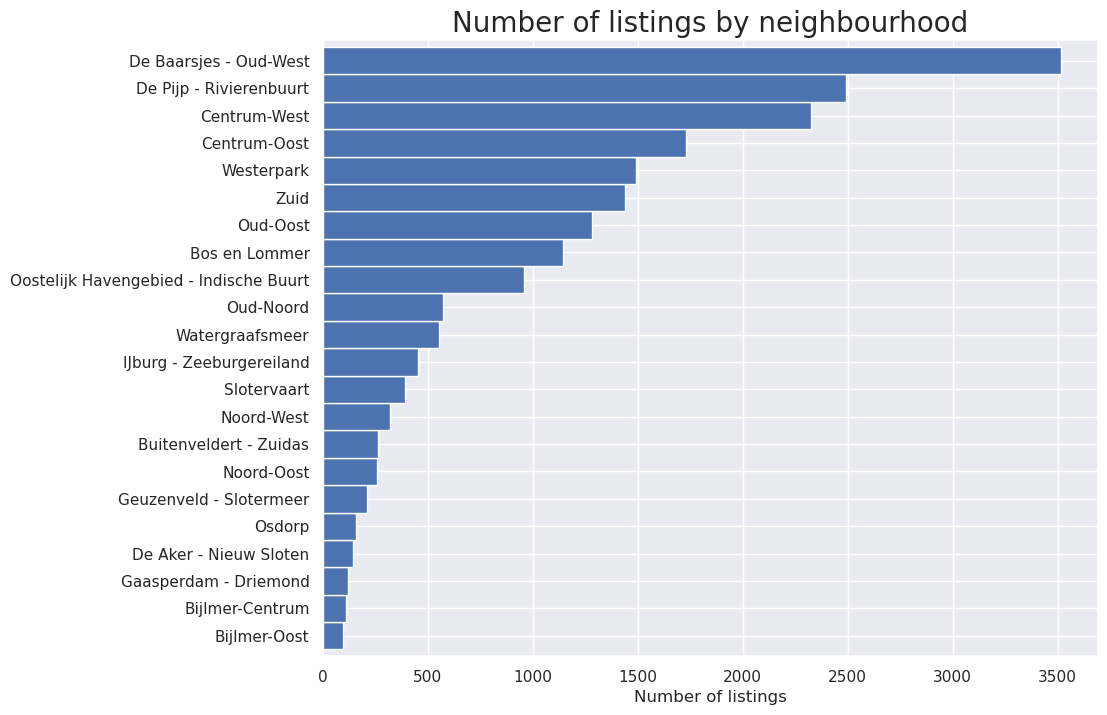

In [21]:
import matplotlib.pyplot as plt
feq=listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [27]:
lats2018 = listings['latitude'].to_list()
logs2018 = listings['longitude'].to_list()
locations = list(zip(lats2018, logs2018))

map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

<h1>Room types and property types</h1>
The room type is very important in Amsterdam, because Amsterdam has a rule that Entire homes/apartments can only be rented out via Airbnb for a maximum of 60 days a year. Below, we can see that this restriction applies to most of the listings.

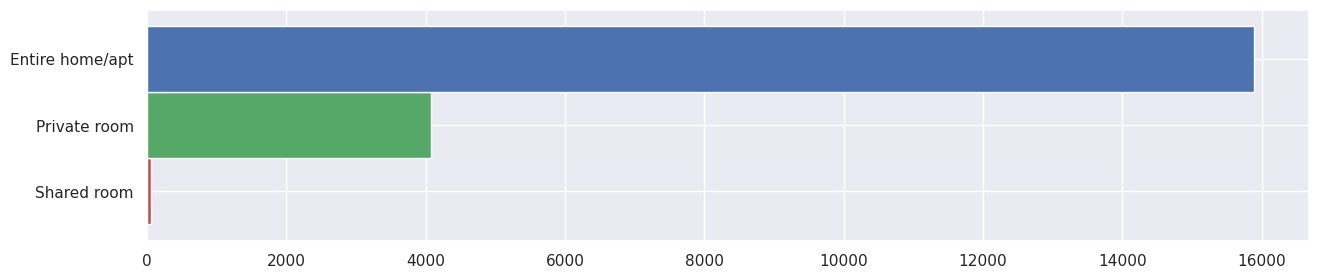

In [32]:
freq = listings['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15,3), width=1, color=["r","g","b"])
plt.show()

<h2>Property Types</h2>

In [33]:
listings.property_type.unique()

array(['Apartment', 'Townhouse', 'Houseboat', 'Bed and breakfast', 'Boat',
       'Guest suite', 'Loft', 'Serviced apartment', 'House',
       'Boutique hotel', 'Guesthouse', 'Other', 'Condominium', 'Chalet',
       'Nature lodge', 'Tiny house', 'Hotel', 'Villa', 'Cabin',
       'Lighthouse', 'Bungalow', 'Hostel', 'Cottage', 'Tent',
       'Earth house', 'Campsite', 'Castle', 'Camper/RV', 'Barn',
       'Casa particular (Cuba)', 'Aparthotel'], dtype=object)

<h4>Properties based on the property_types and room_type</h4>

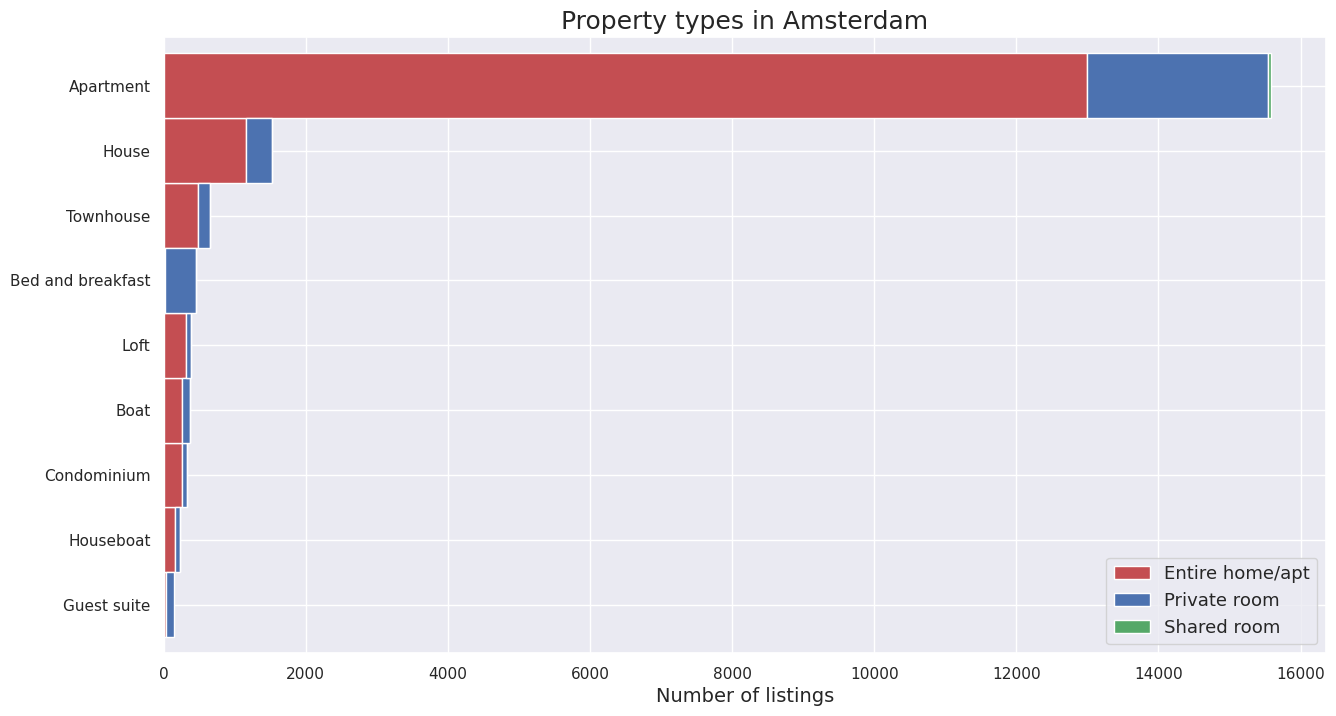

In [34]:
prop = listings.groupby(['property_type', 'room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:, 0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Amsterdam', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

<h2>Accommodates (number of people)</h2>
As expected, most listings are for 2 people, In addition, Airbnb uses a maximum of 16 guests per listings

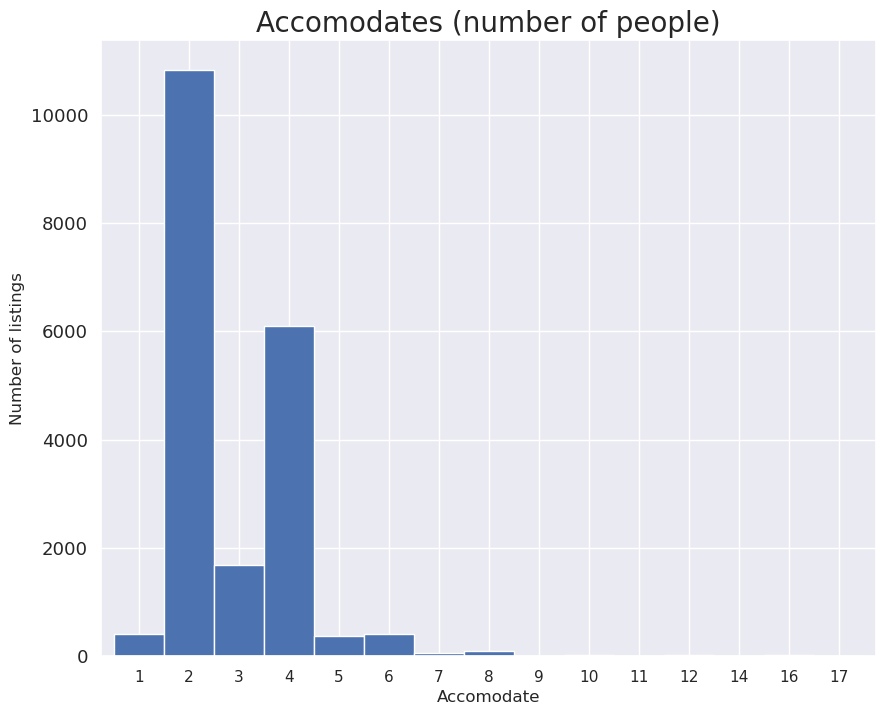

In [35]:
feq = listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accomodates (number of people)", fontsize=20)
plt.ylabel("Number of listings", fontsize=12)
plt.xlabel("Accomodate", fontsize=12)
plt.show()

However, Amsterdam has an additional restriction. Due to fire hazard considerations and also taking possible noisy group into account, owners are only allowed to rent their property to groups with a maximum of 4 people. This actually means that the listings that indicate that the maximum number of people is above 4 are breaking this rule!

# 3. Advice to the municipality of Amsterdam

It is known that Airbnb causes problems in Amsterdam. These problems are described well in this article: [Fed Up With Tourists, Amsterdam Gets Tough On Airbnb, Tourist Taxes And Too Much Partying](https://www.forbes.com/sites/ceciliarodriguez/2018/05/17/amsterdam-overwhelmed-by-tourists-gets-tough-on-airbnb-tourists-taxes-too-much-partying/#5c6c78892be5)

>The coalition of parties forming the city’s new government wants to follow the examples of Barcelona and Venice, where the flood of unruly tourism has made life extremely unpleasant for residents, forcing  officials to try to control the number of visitors and their behavior.

Extra rules that Amsterdam has in place when compared to Airbnb's own rules are:

* The maximum number of guests is 4 (see also previous section)
* The maximum number for short-term rental is 60 days per calendar year. This rules is only for renting out entire properties, and therefore does not apply to renting out private rooms. This rule was already enforced by Airbnb (after 60 days of bookings, Airbnb closes the availability of the listing for the rest of the year). As you can read in the article, the number will be lowered to a maximum of 30 days a year.
* Amsterdam intends to ban Airbnb entirely in three neighourhoods: de Wallen (Red Light District), Kinkerbuurt and Haarlemmerbuurt
* For renting out Private Rooms, there is also the restriction that an owner cannot rent-out rooms that accumulate to more than 40% of the total surface (in square meters)

## 3.1 Finding possibly illegal hotels
Any owner renting out more than 40% of his/her property as Private Rooms is breaking the last rule mentioned in the previous section, but in this section I am only going to look for extreme cases.

Below, I am displaying the  five hosts having the most Private Room listings. Unfortunately, Airbnb does not give the addresses of the listings. The field "street" is actually in the database, but as you can see these are certainly not full, real addresses! Therefore, from this table I cannot say if these listings from are in fact in the same house.


In [ ]:
private = 